<a href="https://colab.research.google.com/github/Sruthi-Shivaram/Ml_Minor/blob/main/ML_5_minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')


In [ ]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
data['Age_Label'] = pd.cut(x=data['Age'], bins=[0, 20, 40, 60, 80],
                     labels=['0-20', '20-40', '40-60',
                             '60-80'])
data['Age_Label']=data['Age_Label'].map({'0-20':1,'20-40':2,'40-60':3,'60-80':4}) 



In [ ]:
test_data['Age_Label'] = pd.cut(x=data['Age'], bins=[0, 20, 40, 60, 80],
                     labels=['0-20', '20-40', '40-60',
                             '60-80'])
test_data['Age_Label']=test_data['Age_Label'].map({'0-20':1,'20-40':2,'40-60':3,'60-80':4})

In [ ]:
data.shape

(8693, 15)

In [ ]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Age_Label'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   VIP           8490 non-null   object  
 7   RoomService   8512 non-null   float64 
 8   FoodCourt     8510 non-null   float64 
 9   ShoppingMall  8485 non-null   float64 
 10  Spa           8510 non-null   float64 
 11  VRDeck        8505 non-null   float64 
 12  Name          8493 non-null   object  
 13  Transported   8693 non-null   bool    
 14  Age_Label     8336 non-null   category
dtypes: bool(1), category(1), float64(6), object(7)
memory usage: 900.2+ KB


In [ ]:
data.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
Age_Label          4
dtype: int64

In [ ]:
test_data.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
Age_Label          4
dtype: int64

In [ ]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Age_Label       357
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Age_Label       182
dtype: int64

In [ ]:
data['Passenger_Group'], data['Passenger_no'] = data['PassengerId'].str.split('_', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [ ]:
data['Cabin_1'],data['Cabin_2']=data['Cabin'].str.split('/', 1).str
data['Cabin_2'],data['Cabin_3']=data['Cabin_2'].str.split('/', 1).str
data['Total']=data['VIP']+data['RoomService']+data['Spa']+data['ShoppingMall']+data['VRDeck']
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Age_Label,Passenger_Group,Passenger_no,Cabin_1,Cabin_2,Cabin_3,Total
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,2,0001,01,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2,0002,01,F,0,S,727.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3,0003,01,A,0,S,6808.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,2,0003,02,A,0,S,3893.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,1,0004,01,F,1,S,1021.0


In [ ]:
test_data['Passenger_Group'], test_data['Passenger_no'] = test_data['PassengerId'].str.split('_', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [ ]:
test_data['Cabin_1'],test_data['Cabin_2']=test_data['Cabin'].str.split('/', 1).str
test_data['Cabin_2'],test_data['Cabin_3']=test_data['Cabin_2'].str.split('/', 1).str
test_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_Label,Passenger_Group,Passenger_no,Cabin_1,Cabin_2,Cabin_3
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,2,0013,01,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,2,0018,01,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,3,0019,01,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,2,0021,01,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0023,01,F,5,S


In [ ]:
data.drop(['Name'], axis=1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Label,Passenger_Group,Passenger_no,Cabin_1,Cabin_2,Cabin_3,Total
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,2,0001,01,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2,0002,01,F,0,S,727.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3,0003,01,A,0,S,6808.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,0003,02,A,0,S,3893.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0004,01,F,1,S,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,3,9276,01,A,98,P,1718.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,1,9278,01,G,1499,S,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,2,9279,01,G,1500,S,1873.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,2,9280,01,E,608,S,3588.0


In [ ]:
test_data.drop(['Name'], axis=1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Label,Passenger_Group,Passenger_no,Cabin_1,Cabin_2,Cabin_3
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,2,0013,01,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,2,0018,01,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,3,0019,01,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,2,0021,01,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,1,0023,01,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,3,9266,02,G,1496,S
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,2,9269,01,NaN,NaN,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,3,9271,01,D,296,P
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,3,9273,01,D,297,P


In [ ]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Age_Label', 'Passenger_Group', 'Passenger_no',
       'Cabin_1', 'Cabin_2', 'Cabin_3', 'Total'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    data[y] = le.fit_transform(data[y])
 
label_list = ['HomePlanet','CryoSleep', 'Cabin','Destination','VIP','Transported','Cabin_1','Cabin_2','Cabin_3','Age_Label']
 
for l in label_list:
    label_encoder(l)
 
#Display transformed data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Age_Label,Passenger_Group,Passenger_no,Cabin_1,Cabin_2,Cabin_3,Total
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0,1,0001,01,1,0,0,0.0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,...,44.0,Juanna Vines,1,1,0002,01,5,0,1,727.0
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,...,49.0,Altark Susent,0,2,0003,01,0,0,1,6808.0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,...,193.0,Solam Susent,0,1,0003,02,0,0,1,3893.0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,...,2.0,Willy Santantines,1,0,0004,01,5,1,1,1021.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    test_data[y] = le.fit_transform(test_data[y])
 
label_list = ['HomePlanet','CryoSleep', 'Cabin','Destination','VIP','Cabin_1','Cabin_2','Cabin_3','Age_Label']
 
 
for l in label_list:
    label_encoder(l)
 
#Display transformed data
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_Label,Passenger_Group,Passenger_no,Cabin_1,Cabin_2,Cabin_3
0,0013_01,0,1,2784,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,0013,01,6,820,1
1,0018_01,0,0,1867,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,0018,01,5,927,1
2,0019_01,1,1,257,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,2,0019,01,2,0,1
3,0021_01,1,0,259,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1,0021,01,2,1,1
4,0023_01,0,0,1940,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,0023,01,5,1029,1


In [ ]:
data['Passenger_Group']=data['Passenger_Group'].astype(float)

In [ ]:
data['Passenger_no']=data['Passenger_no'].astype(float)


In [ ]:
test_data['Passenger_Group']=test_data['Passenger_Group'].astype(float)

In [ ]:
test_data['Passenger_no']=test_data['Passenger_no'].astype(float)


In [ ]:
data.describe()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Age_Label,Passenger_Group,Passenger_no,Cabin_1,Cabin_2,Cabin_3
count,8693.000000,8693.000000,8693.000000,8693.000000,8514.000000,8693.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.719199,0.399287,3227.857702,1.515242,28.827930,0.069596,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,1.088002,4633.389624,1.517773,4.389969,967.028414,0.539054
std,0.863402,0.538345,2018.301775,0.840148,14.489021,0.333871,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016,0.946916,2671.028856,1.054241,1.842573,515.338912,0.542487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1341.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000,3.000000,523.000000,0.000000
50%,0.000000,0.000000,3218.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4630.000000,1.000000,5.000000,1009.000000,1.000000
75%,1.000000,1.000000,5018.000000,2.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000,1.000000,6883.000000,2.000000,6.000000,1363.000000,1.000000
max,3.000000,2.000000,6560.000000,3.000000,79.000000,2.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,4.000000,9280.000000,8.000000,8.000000,1817.000000,2.000000


In [ ]:
data.isnull().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Cabin                0
Destination          0
Age                179
VIP                  0
RoomService        181
FoodCourt          183
ShoppingMall       208
Spa                183
VRDeck             188
Name               200
Transported          0
Age_Label            0
Passenger_Group      0
Passenger_no         0
Cabin_1              0
Cabin_2              0
Cabin_3              0
Total              932
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8693 non-null   int64  
 2   CryoSleep        8693 non-null   int64  
 3   Cabin            8693 non-null   int64  
 4   Destination      8693 non-null   int64  
 5   Age              8514 non-null   float64
 6   VIP              8693 non-null   int64  
 7   RoomService      8512 non-null   float64
 8   FoodCourt        8510 non-null   float64
 9   ShoppingMall     8485 non-null   float64
 10  Spa              8510 non-null   float64
 11  VRDeck           8505 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   int64  
 14  Age_Label        8693 non-null   int64  
 15  Passenger_Group  8693 non-null   float64
 16  Passenger_no     8693 non-null   float64
 17  Cabin_1       

In [ ]:
data['Age'].fillna(value = 28,
          inplace = True)
data['RoomService'].fillna(value =0,
          inplace = True)
data['FoodCourt'].fillna(value = 0,
          inplace = True)
data['ShoppingMall'].fillna(value = 0,
          inplace = True)
data['Spa'].fillna(value =0,
          inplace = True)
data['VRDeck'].fillna(value = 0,
          inplace = True)
data['Age_Label'].fillna(value = 1,
          inplace = True)


In [ ]:
test_data.describe()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age_Label,Passenger_Group,Passenger_no,Cabin_1,Cabin_2,Cabin_3
count,4277.000000,4277.000000,4277.000000,4277.000000,4186.000000,4277.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,0.727847,0.404489,1612.368483,1.537526,28.658146,0.060790,219.266269,439.484296,177.295525,303.052443,310.710031,1.104045,4639.296469,1.498714,4.438859,783.609773,0.536123
std,0.867673,0.533322,1011.700045,0.827671,14.179072,0.317186,607.011289,1527.663045,560.821123,1117.186015,1246.994742,0.960723,2716.197368,1.018221,1.786765,420.223153,0.543623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,664.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2249.000000,1.000000,4.000000,440.000000,0.000000
50%,0.000000,0.000000,1610.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4639.000000,1.000000,5.000000,801.000000,1.000000
75%,1.000000,1.000000,2515.000000,2.000000,37.000000,0.000000,53.000000,78.000000,33.000000,50.000000,36.000000,2.000000,7030.000000,2.000000,6.000000,1119.000000,1.000000
max,3.000000,2.000000,3265.000000,3.000000,79.000000,2.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,4.000000,9277.000000,8.000000,8.000000,1505.000000,2.000000


In [ ]:
test_data['Age'].fillna(value = 28,
          inplace = True)
test_data['RoomService'].fillna(value = 0,
          inplace = True)
test_data['FoodCourt'].fillna(value = 0,
          inplace = True)
test_data['ShoppingMall'].fillna(value = 0,
          inplace = True)
test_data['Spa'].fillna(value = 0,
          inplace = True)
test_data['VRDeck'].fillna(value = 0,
          inplace = True)
test_data['Age_Label'].fillna(value=1,inplace=True)


In [ ]:
test_data.isnull().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name               94
Age_Label           0
Passenger_Group     0
Passenger_no        0
Cabin_1             0
Cabin_2             0
Cabin_3             0
dtype: int64

In [ ]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Age_Label,Passenger_Group,Passenger_no,Cabin_1,Cabin_2,Cabin_3,Total
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0,1,1.0,1.0,1,0,0,0.0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,...,44.0,Juanna Vines,1,1,2.0,1.0,5,0,1,727.0
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,...,49.0,Altark Susent,0,2,3.0,1.0,0,0,1,6808.0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,...,193.0,Solam Susent,0,1,3.0,2.0,0,0,1,3893.0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,...,2.0,Willy Santantines,1,0,4.0,1.0,5,1,1,1021.0


In [ ]:
data.isnull().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Cabin                0
Destination          0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name               200
Transported          0
Age_Label            0
Passenger_Group      0
Passenger_no         0
Cabin_1              0
Cabin_2              0
Cabin_3              0
Total              932
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name               94
Age_Label           0
Passenger_Group     0
Passenger_no        0
Cabin_1             0
Cabin_2             0
Cabin_3             0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

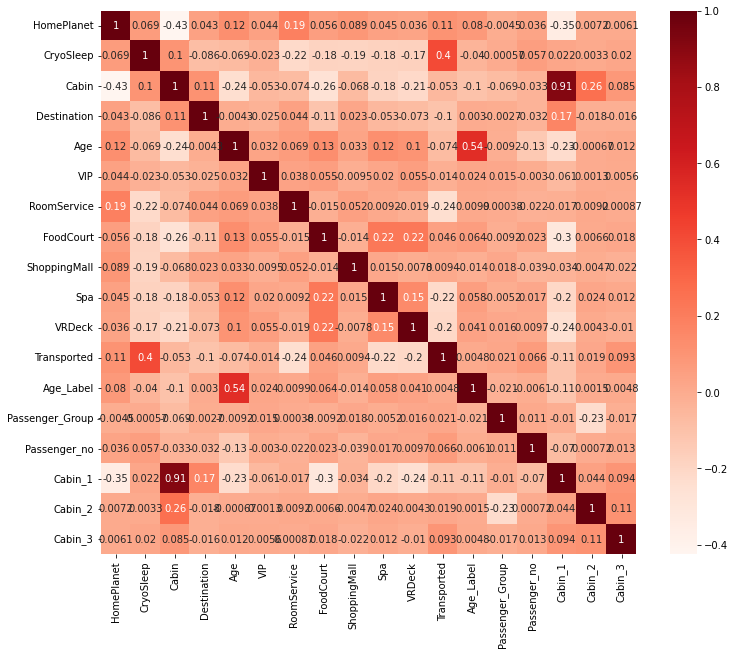

In [ ]:
import matplotlib.pyplot as plt
correlation=data.corr()
correlation
plt.figure(figsize=(12,10))

sns.heatmap(correlation,annot=True,cmap=plt.cm.Reds)
plt.show

In [ ]:
correlation_mat = data.corr()
corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

Age              Age_Label          0.537698
Age_Label        Age                0.537698
Cabin            Cabin_1            0.912350
Cabin_1          Cabin              0.912350
HomePlanet       HomePlanet         1.000000
Cabin_1          Cabin_1            1.000000
CryoSleep        CryoSleep          1.000000
Cabin            Cabin              1.000000
Destination      Destination        1.000000
Age              Age                1.000000
VIP              VIP                1.000000
RoomService      RoomService        1.000000
Cabin_2          Cabin_2            1.000000
FoodCourt        FoodCourt          1.000000
Spa              Spa                1.000000
VRDeck           VRDeck             1.000000
Transported      Transported        1.000000
Age_Label        Age_Label          1.000000
Passenger_Group  Passenger_Group    1.000000
Passenger_no     Passenger_no       1.000000
ShoppingMall     ShoppingMall       1.000000
Cabin_3          Cabin_3            1.000000
dtype: flo

Model Training

In [ ]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Age_Label', 'Passenger_Group', 'Passenger_no',
       'Cabin_1', 'Cabin_2', 'Cabin_3', 'Total'],
      dtype='object')

In [ ]:
Selected_features = ['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP', 'RoomService', 'FoodCourt','ShoppingMall','Spa', 'VRDeck','Passenger_Group','Passenger_no']
X = data[Selected_features]
y = data['Transported']

In [ ]:
test_data.isnull().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name               94
Age_Label           0
Passenger_Group     0
Passenger_no        0
Cabin_1             0
Cabin_2             0
Cabin_3             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8693 non-null   int64  
 2   CryoSleep        8693 non-null   int64  
 3   Cabin            8693 non-null   int64  
 4   Destination      8693 non-null   int64  
 5   Age              8693 non-null   float64
 6   VIP              8693 non-null   int64  
 7   RoomService      8693 non-null   float64
 8   FoodCourt        8693 non-null   float64
 9   ShoppingMall     8693 non-null   float64
 10  Spa              8693 non-null   float64
 11  VRDeck           8693 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   int64  
 14  Age_Label        8693 non-null   int64  
 15  Passenger_Group  8693 non-null   float64
 16  Passenger_no     8693 non-null   float64
 17  Cabin_1       

In [ ]:
data[Selected_features]=data[Selected_features].astype(float)

In [ ]:
test_data[Selected_features]=test_data[Selected_features].astype(float)

In [ ]:
test_data.isnull().sum()

PassengerId         0
HomePlanet          0
CryoSleep           0
Cabin               0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name               94
Age_Label           0
Passenger_Group     0
Passenger_no        0
Cabin_1             0
Cabin_2             0
Cabin_3             0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)


In [ ]:
X_train.isnull().sum()

HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Passenger_Group    0
Passenger_no       0
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

  


model = LogisticRegression(random_state=0) 
model.fit(X_train, y_train)
y_pred1=model.predict(X_test)

print(y_pred1)
confusion_matrix = confusion_matrix(y_test, y_pred1)

print(confusion_matrix)



[1 1 1 ... 0 0 0]
[[742 316]
 [132 984]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('Accuracy score: ', accuracy_score(y_test, y_pred1))
print('Precision score: ', precision_score(y_test, y_pred1))
print('Recall score: ', recall_score(y_test, y_pred1))
print("F1 score: ",f1_score(y_test, y_pred1))

Accuracy score:  0.7939282428702852
Precision score:  0.7569230769230769
Recall score:  0.8817204301075269
F1 score:  0.8145695364238411


In [ ]:
X1 =test_data[Selected_features]

In [ ]:
ypred2=model.predict(X1)


In [ ]:
df_5 = pd.DataFrame(test_data['PassengerId'])
df_5['Transported'] = pd.DataFrame(ypred2,columns = ['Transported'])


df_5['Transported'] = df_5['Transported'].map({1:True,0:False})   



In [ ]:
df_5.to_csv('sruthioutput.csv')